Data Cleaning Summary

Bookings Dataset (`bookings.csv`)

Customer ID Cleaning:
   - Extracted digits from the `customer_id` field and converted it to an integer type.

Booking ID Cleaning:
   - Extracted digits from the `booking_id` field and converted it to an integer type.
  

Booking Time Conversion:
   - Converted the `booking_time` field to a proper datetime format using `pd.to_datetime()`.
   

Sessions Dataset (`sessions.csv`)

Session ID Cleaning:
   - Extracted digits from the `session_id` field and converted it to an integer type.
   -
Search ID Cleaning:
   - Extracted digits from the `search_id` field and converted it to an integer type.
   
Search Time and Session Starting Time Conversion:
   - Converted the `search_time` field to a proper datetime format using `pd.to_datetime()`, with error coercion to handle invalid entries.
   - Converted the `session_starting_time` field to a proper datetime format similarly, ensuring consistent date-time formatting.

Booking ID Cleaning in Sessions:
   - Extracted digits from the `booking_id` field and converted it to a float type to accommodate any potential null values.

Handling Missing Values:
   - Filled missing values in `session_starting_time` and `search_time` with 0 to avoid issues during analysis.
   - Filled missing values in `booking_id` with 0, ensuring no null values interfere with further data processing.

In [5]:
import pandas as pd

bookings = pd.read_csv('datasets_4cp_0ine904\Datasets\Bookings.csv')
sessions = pd.read_csv('datasets_4cp_0ine904\Datasets\Sessions.csv')

# Step 1: Cleaning customer_id and booking_id in bookings.csv
bookings['customer_id'] = bookings['customer_id'].str.extract('(\d+)').astype(int)
bookings['booking_id'] = bookings['booking_id'].str.extract('(\d+)').astype(int)
# bookings['booking_time'] = pd.to_datetime(bookings['booking_time'], format='%Y-%m-%dT%H:%M:%S.%fZ', errors='coerce')
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])

# Step 2: Cleaning session_id and search_id in sessions.csv
sessions['session_id'] = sessions['session_id'].str.extract('(\d+)').astype(int)
sessions['search_id'] = sessions['search_id'].str.extract('(\d+)').astype(int)


# Step 3: Converting search_time and session_starting_time to proper datetime formats
sessions['search_time'] = pd.to_datetime(sessions['search_time'], format='%Y-%m-%dT%H:%M:%S.%fZ', errors='coerce')
sessions['session_starting_time'] = pd.to_datetime(sessions['session_starting_time'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')


# Step 1: Cleaning booking_id in session.csv
sessions['booking_id'] = sessions['booking_id'].str.extract('(\d+)').astype(float)  # Extract digits and convert to float

# Step 2: Cleaning session_starting_time in session.csv
sessions['session_starting_time'].fillna(0, inplace=True)

# Step 3: Cleaning search_time in session.csv
sessions['search_time'].fillna(0, inplace=True)
sessions['booking_id'].fillna(0, inplace=True) 


# Save the cleaned data (optional)
bookings.to_csv('cleaned_data/cleaned_bookings.csv', index=False)
sessions.to_csv('cleaned_data/cleaned_sessions.csv', index=False)





Importing Libraries

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

 Load the CSV files into Pandas DataFrames

In [7]:

bookings_df = pd.read_csv('cleaned_data\cleaned_bookings.csv')
sessions_df = pd.read_csv('cleaned_data\cleaned_sessions.csv')

Find the number of distinct bookings, sessions, and searches from the given datasets

In [8]:
# Count distinct bookings
distinct_bookings = bookings_df['booking_id'].nunique()

# Count distinct sessions
distinct_sessions = sessions_df['session_id'].nunique()

# Count distinct searches (assuming search_id is in sessions.csv)
distinct_searches = sessions_df['search_id'].nunique()

# Output the results
print(f"Number of distinct bookings: {distinct_bookings}")
print(f"Number of distinct sessions: {distinct_sessions}")
print(f"Number of distinct searches: {distinct_searches}")

Number of distinct bookings: 339
Number of distinct sessions: 331
Number of distinct searches: 1360


 How many sessions have more than one booking 

In [9]:
# session_booking_counts = sessions_df.groupby('session_id')['booking_id'].nunique()

# # Count sessions with more than one booking
# sessions_with_multiple_bookings = (session_booking_counts > 1).sum()

# # Output the result
# print(f"Sessions with more than one booking: {sessions_with_multiple_bookings}")


# Merge the sessions and bookings DataFrames on booking_id
merged_df = pd.merge(sessions_df, bookings_df, on='booking_id', how='inner')

# Count the number of bookings per session
bookings_per_session = merged_df.groupby('session_id')['booking_id'].nunique()

# Filter sessions that have more than one booking
sessions_with_multiple_bookings = bookings_per_session[bookings_per_session > 1]

# Get the number of sessions with more than one booking
num_sessions_with_multiple_bookings = sessions_with_multiple_bookings.count()

print(f"Number of sessions with more than one booking: {num_sessions_with_multiple_bookings}")

Number of sessions with more than one booking: 225


Which days of the week have the highest number of bookings? Also, draw a pie chart to 
show the distribution for all days of the week 

Days with the highest number of bookings: Thursday


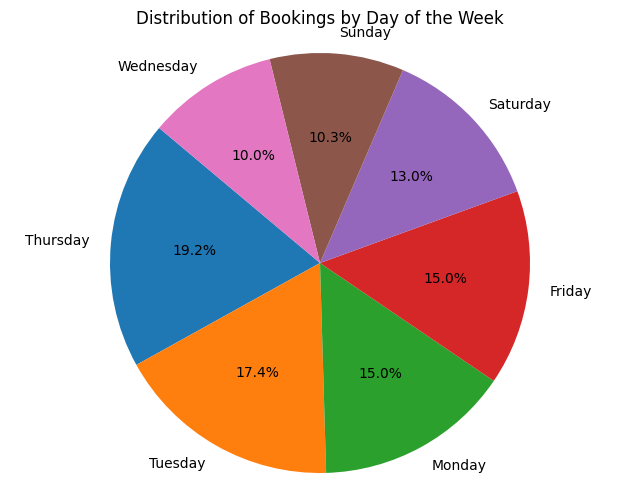

In [12]:


# Extract day of the week (Monday=0, Sunday=6)
bookings_df['day_of_week'] = bookings_df['booking_time'].dt.dayofweek

# Map day_of_week to actual day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bookings_df['day_name'] = bookings_df['day_of_week'].map(lambda x: day_names[x])

# Count bookings per day
bookings_per_day = bookings_df['day_name'].value_counts()

# Determine the day(s) with the highest bookings
max_bookings = bookings_per_day.max()
days_with_max_bookings = bookings_per_day[bookings_per_day == max_bookings].index.tolist()

# Print the result
print(f"Days with the highest number of bookings: {', '.join(days_with_max_bookings)}")

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(bookings_per_day, labels=bookings_per_day.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Bookings by Day of the Week')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

For each of the service names, display the total number of bookings and the total Gross 
Booking Value in INR 

In [13]:
# Group by service_name and calculate total bookings and total GBV
service_stats = bookings_df.groupby('service_name').agg({
    'booking_id': 'count',  # Total number of bookings
    'INR_Amount': 'sum'     # Total Gross Booking Value (GBV) in INR
}).rename(columns={
    'booking_id': 'Total Bookings',
    'INR_Amount': 'Total GBV (INR)'
}).reset_index()

# Display the results
print(service_stats)

  service_name  Total Bookings  Total GBV (INR)
0      GOIBIBO             186       5897637.97
1          MMT              48        665669.08
2        YATRA             105       3378702.13


For customers who have more than 1 booking, which is the most booked route 
(from_city to to_city)? 

In [14]:
# Filter customers with more than one booking
customers_with_multiple_bookings = bookings_df['customer_id'].value_counts()
customers_with_multiple_bookings = customers_with_multiple_bookings[customers_with_multiple_bookings > 1].index.tolist()

filtered_bookings = bookings_df[bookings_df['customer_id'].isin(customers_with_multiple_bookings)]

# Group by from_city and to_city, calculate total bookings
route_stats = filtered_bookings.groupby(['from_city', 'to_city']).size().reset_index(name='total_bookings')

# Find the most booked route
most_booked_route = route_stats.loc[route_stats['total_bookings'].idxmax()]

# Display the result
print(f"The most booked route for customers with more than one booking is from {most_booked_route['from_city']} to {most_booked_route['to_city']}.")

The most booked route for customers with more than one booking is from Gurgaon to Roissy-en-France.


 Which are the top 3 departure cities from where customers book mostly in advance, 
provided that there have been at least 5 departures from that city? 

In [15]:
# Filter cities with at least 5 departures
departure_counts = bookings_df['from_city'].value_counts()
valid_cities = departure_counts[departure_counts >= 5].index.tolist()

filtered_bookings = bookings_df[bookings_df['from_city'].isin(valid_cities)]

# Calculate average days_to_departure for each city
city_stats = filtered_bookings.groupby('from_city')['days_to_departure'].mean().reset_index()

# Sort cities by average days_to_departure and get top 3
top_departure_cities = city_stats.sort_values(by='days_to_departure').head(3)

# Display the result
print("Top 3 departure cities with most advance bookings:")
for idx, row in top_departure_cities.iterrows():
    print(f"{row['from_city']}: Average days to departure = {row['days_to_departure']:.2f} days")

Top 3 departure cities with most advance bookings:
Rāja Sānsi: Average days to departure = 8.82 days
Ahmedabad: Average days to departure = 11.75 days
Delhi: Average days to departure = 12.76 days


Plot a heatmap displaying correlations of the numerical column and report which pair 
of numerical columns in the bookings dataset, have the maximum correlation?

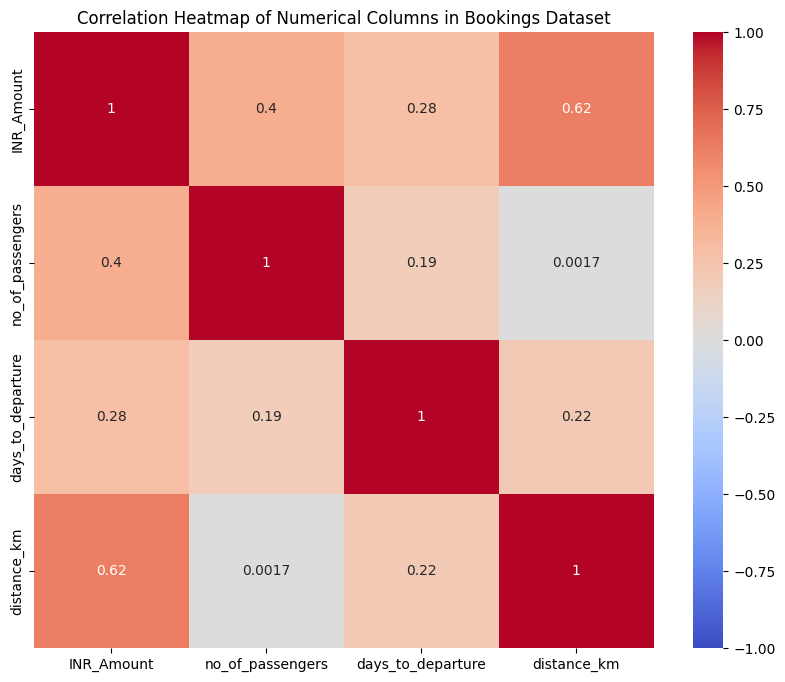

The pair of numerical columns with the maximum correlation is: ('INR_Amount', 'INR_Amount') with correlation coefficient 1.00


In [16]:
numerical_columns = ['INR_Amount', 'no_of_passengers', 'days_to_departure', 'distance_km']

# Calculate correlation matrix
correlation_matrix = bookings_df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Columns in Bookings Dataset')
plt.show()

# Find pair of numerical columns with maximum correlation
max_corr = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
max_corr_pair = max_corr.idxmax()

# Display the result
print(f"The pair of numerical columns with the maximum correlation is: {max_corr_pair} with correlation coefficient {max_corr[max_corr_pair]:.2f}")

For each service, which is the most used device type for making bookings on the 
platform? 

In [17]:
service_device_stats = bookings_df.groupby(['service_name', 'device_type_used']).size().reset_index(name='total_bookings')

# Find the most used device type for each service
idx = service_device_stats.groupby(['service_name'])['total_bookings'].transform(max) == service_device_stats['total_bookings']
most_used_devices = service_device_stats[idx]

# Display the result
print("Most used device type for each service:")
for idx, row in most_used_devices.iterrows():
    print(f"Service: {row['service_name']}, Most used device type: {row['device_type_used']} with {row['total_bookings']} bookings")

Most used device type for each service:
Service: GOIBIBO, Most used device type: IOS with 70 bookings
Service: MMT, Most used device type: Desktop with 30 bookings
Service: YATRA, Most used device type: Desktop with 51 bookings


 Plot the trends at a quarterly frequency for the number of bookings by each of the 
device types, that is, plot a time series for each year and quarter showing the number 
of bookings performed by each device type 

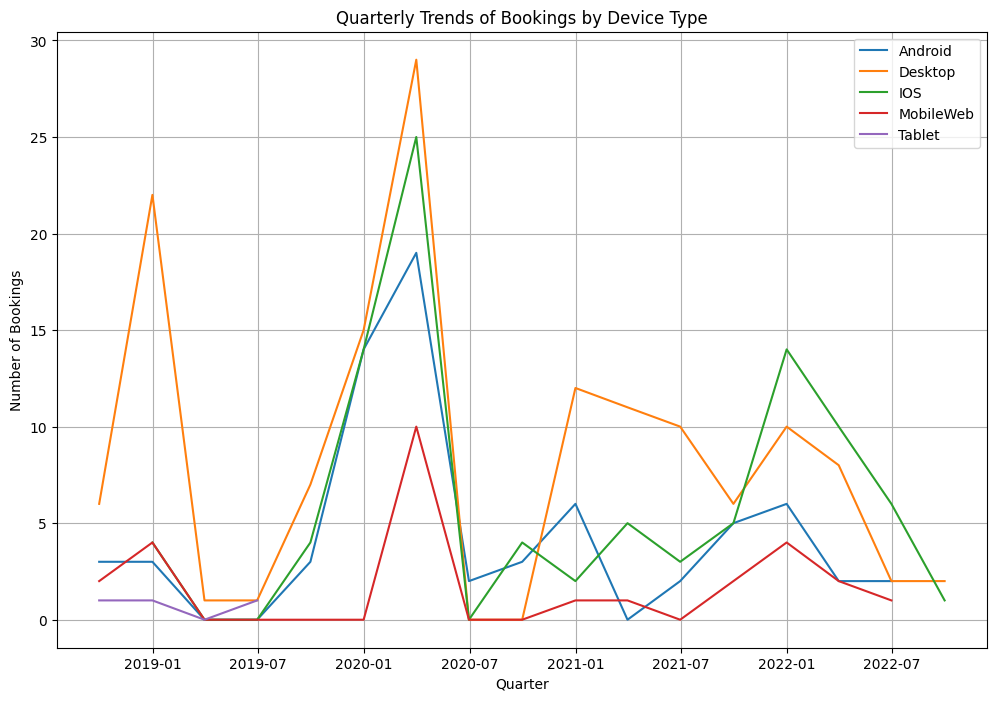

In [18]:
# Set booking_time as index
bookings_df.set_index('booking_time', inplace=True)

# Group by device_type_used and resample to quarterly frequency
quarterly_device_stats = bookings_df.groupby('device_type_used').resample('Q').size().unstack(level=0)

# Plotting quarterly trends
plt.figure(figsize=(12, 8))
for device_type in quarterly_device_stats.columns:
    plt.plot(quarterly_device_stats.index, quarterly_device_stats[device_type], label=device_type)

plt.title('Quarterly Trends of Bookings by Device Type')
plt.xlabel('Quarter')
plt.ylabel('Number of Bookings')
plt.legend()
plt.grid(True)
plt.show()

Consider the following example:12 customers performed a total of 100 searches but
only a few of them performed 10 bookings in total. 
searches=100 bookings=10 customers=12 
The overall booking to search ratio, Ober, is 10/100 = 0.1 Using the above 
information/context, answer the following: 
• What is the average oBSR for each month of the year? 
• What is the average oBSR for each day of the week? 
• Plot a time series of oBSR on all the given dates. 

C:\Users\Suresh Muthusamy P\AppData\Local\Temp\ipykernel_29120\2193274472.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bookings_df['year_month'] = bookings_df['booking_time'].dt.to_period('M')


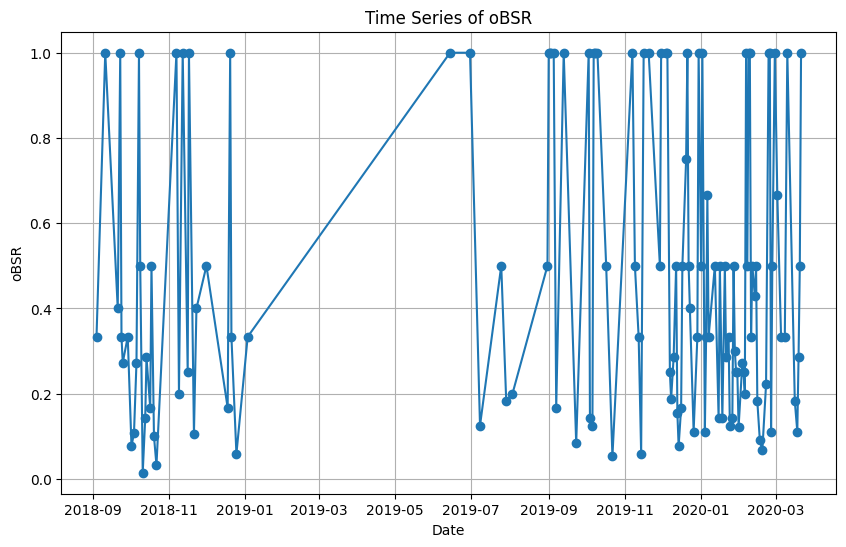

Average oBSR for each month of the year:
   year_month      oBSR
0     2018-09  0.387097
1     2018-10  0.095238
2     2018-11  0.250000
3     2018-12  0.193548
4     2019-01  0.333333
5     2019-06  1.000000
6     2019-07  0.217391
7     2019-08  0.285714
8     2019-09  0.304348
9     2019-10  0.214286
10    2019-11  0.285714
11    2019-12  0.228070
12    2020-01  0.226027
13    2020-02  0.306452
14    2020-03  0.300000

Average oBSR for each day of the week:
  day_of_week      oBSR
0      Friday  0.428571
1      Monday  0.366906
2    Saturday  0.366667
3      Sunday  0.614035
4    Thursday  0.371429
5     Tuesday  0.443609
6   Wednesday  0.340000


In [30]:

if "booking_time" in bookings_df.columns and "search_time" in sessions_df.columns:

    bookings_df = bookings_df.dropna(subset=['booking_time'])
    sessions_df = sessions_df.dropna(subset=['search_time'])

    # Extract year, month, and day of the week from booking_time and search_time
    bookings_df['year_month'] = bookings_df['booking_time'].dt.to_period('M')
    bookings_df['day_of_week'] = bookings_df['booking_time'].dt.day_name()
    sessions_df['year_month'] = sessions_df['search_time'].dt.to_period('M')
    sessions_df['day_of_week'] = sessions_df['search_time'].dt.day_name()

    # Calculate the total number of bookings and searches per month
    monthly_bookings = bookings_df.groupby('year_month')['booking_id'].nunique().reset_index(name='monthly_bookings')
    monthly_searches = sessions_df.groupby('year_month')['search_id'].nunique().reset_index(name='monthly_searches')

    # Merge the monthly bookings and searches DataFrames
    monthly_data = pd.merge(monthly_bookings, monthly_searches, on='year_month')

    # Calculate the average oBSR for each month
    monthly_data['oBSR'] = monthly_data['monthly_bookings'] / monthly_data['monthly_searches']

    # Calculate the total number of bookings and searches per day of the week
    weekly_bookings = bookings_df.groupby('day_of_week')['booking_id'].nunique().reset_index(name='weekly_bookings')
    weekly_searches = sessions_df.groupby('day_of_week')['search_id'].nunique().reset_index(name='weekly_searches')

    # Merge the weekly bookings and searches DataFrames
    weekly_data = pd.merge(weekly_bookings, weekly_searches, on='day_of_week')

    # Calculate the average oBSR for each day of the week
    weekly_data['oBSR'] = weekly_data['weekly_bookings'] / weekly_data['weekly_searches']

    # Merge the bookings and sessions DataFrames
    merged_df = pd.merge(bookings_df, sessions_df, on='booking_id', how='inner')

    # Calculate the daily oBSR
    bookings_df['booking_date'] = bookings_df['booking_time'].dt.date
    sessions_df['search_date'] = sessions_df['search_time'].dt.date
    daily_bookings = bookings_df.groupby('booking_date')['booking_id'].nunique().reset_index(name='daily_bookings')
    daily_searches = sessions_df.groupby('search_date')['search_id'].nunique().reset_index(name='daily_searches')
    daily_data = pd.merge(daily_bookings, daily_searches, left_on='booking_date', right_on='search_date', how='outer')
    daily_data['oBSR'] = daily_data['daily_bookings'] / daily_data['daily_searches']

    # Filter out rows with NaN values in oBSR
    daily_data = daily_data.dropna(subset=['oBSR'])

    # Plot the time series of oBSR on all given dates
    plt.figure(figsize=(10, 6))
    plt.plot(daily_data['booking_date'], daily_data['oBSR'], marker='o', linestyle='-')
    plt.title('Time Series of oBSR')
    plt.xlabel('Date')
    plt.ylabel('oBSR')
    plt.grid(True)
    plt.show()

    print("Average oBSR for each month of the year:")
    print(monthly_data[['year_month', 'oBSR']])
    print("\nAverage oBSR for each day of the week:")
    print(weekly_data[['day_of_week', 'oBSR']])
else:
    print("Ensure that 'booking_time' exists in bookings.csv and 'search_time' exists in sessions.csv")
